In [19]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

import ipywidgets as widgets
from ipywidgets import interact



# Data Creation

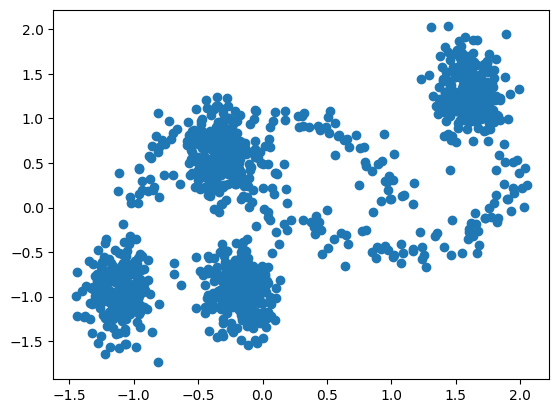

In [7]:
c = 5
centers = [[c, c], [-c, -c], [c+2, -c], [30,10]]
blobs, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=1.7, random_state=5)
blobs = StandardScaler().fit_transform(blobs)

moons, moon_labels = make_moons(n_samples=200, noise=0.11, random_state=8)
array1 = np.append(blobs, moons, axis=0)


plt.scatter(array1[:, 0], array1[:, 1])
plt.show()

# K-Means

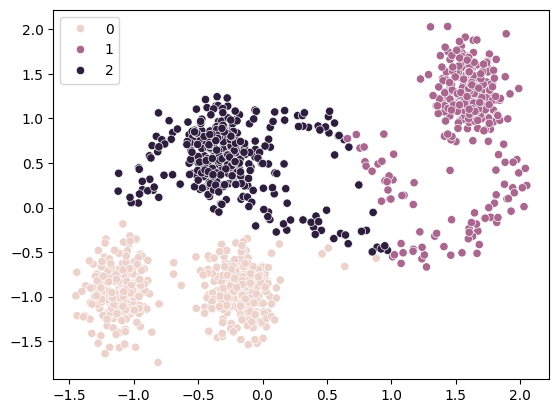

In [3]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(array1)
labels = kmeans.labels_

plt.figure()
sns.scatterplot(x=array1[:, 0], y=array1[:, 1], hue=labels)
plt.show()

In [2]:
slider = widgets.IntSlider(value=5, min=0, max=10, step=1)


In [3]:
slider

IntSlider(value=5, max=10)

In [5]:
slider.value

2

In [16]:
def plot_kmeans_clusters(n):

    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(array1)
    labels = kmeans.labels_+1

    plt.figure()
    sns.scatterplot(x=array1[:, 0], y=array1[:, 1], hue=labels)
    plt.show()
    

n_widget = widgets.Dropdown(options=[1,2,3,4,5], description='Clusters')

widgets.interact(plot_kmeans_clusters, n=n_widget);

interactive(children=(Dropdown(description='Clusters', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_clas…

In [32]:
def plot_dbscan_clusters(eps, min_samples):

    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(array1)
    labels = dbscan.labels_+1

    plt.figure()
    sns.scatterplot(x=array1[:, 0], y=array1[:, 1], hue=labels, palette='deep')
    plt.show()

min_samples_widget = widgets.IntSlider(value=10, min=1, max=60, description='min_samples')
eps_widget = widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='eps')

widgets.interact(plot_dbscan_clusters, eps=eps_widget, min_samples=min_samples_widget);

interactive(children=(FloatSlider(value=0.1, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

In [ ]:
clustering = AgglomerativeClustering().fit(X)
